### **MASTERING ONE-WAY ANOVA IN STATSMODELS**

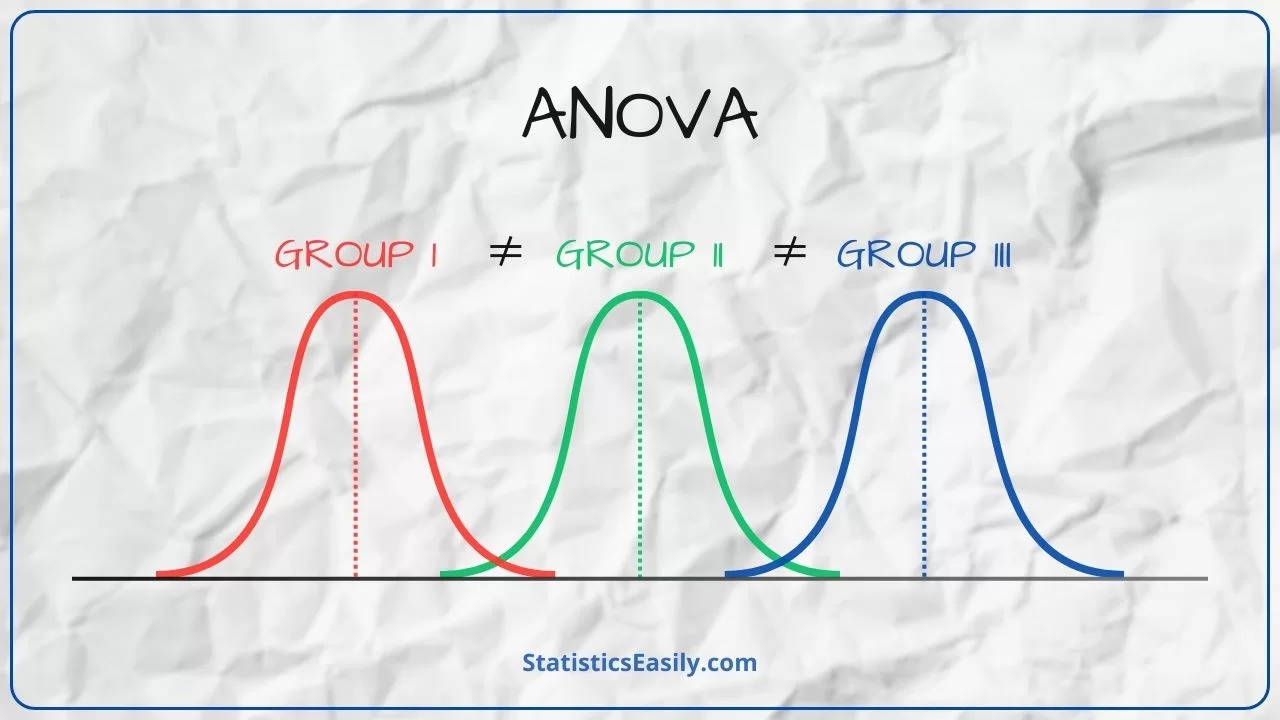

In [1]:
from IPython.display import Image  
Image(filename=r"C:\Users\HP\Downloads\anova.webp",width=700,height=700)

In [2]:
## importing neccessary libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multitest import multipletests
from statsmodels.graphics.gofplots import qqplot
import patsy
import pingouin as pg
import scikit_posthocs as sp


In [3]:
## Importing the dataset  
dataset = pd.read_csv(r"C:\Users\HP\Downloads\diamonds.csv")
## loadinng the dattset 
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
## checking the  shape of the dataset  
dataset.shape

(53940, 10)

In [5]:
## checking the genereal info  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
## checking for the columns v
dataset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
### checking for missing values  
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
## checking for the duplicates  
dataset.duplicated().sum()


146

In [9]:
## drop duplcates
dataset.drop_duplicates(inplace=True)

In [10]:
## checking for descriptive statsistics c
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [11]:
## checking for unique values in each column 
for column in dataset.columns:  
    print(f"Unique values in {column}: {dataset[column].unique()}")
    print(f"Number of unique values in {column}: {dataset[column].nunique()}")
    print("\n")

Unique values in carat: [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 

In [12]:
## checking for the unique values in each category column  
for column in dataset.select_dtypes(include=['object']).columns:  
    print(f"Unique values in {column}: {dataset[column].unique()}")
    print(f"Number of unique values in {column}: {dataset[column].nunique()}")
    print("\n")

Unique values in cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Number of unique values in cut: 5


Unique values in color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Number of unique values in color: 7


Unique values in clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Number of unique values in clarity: 8




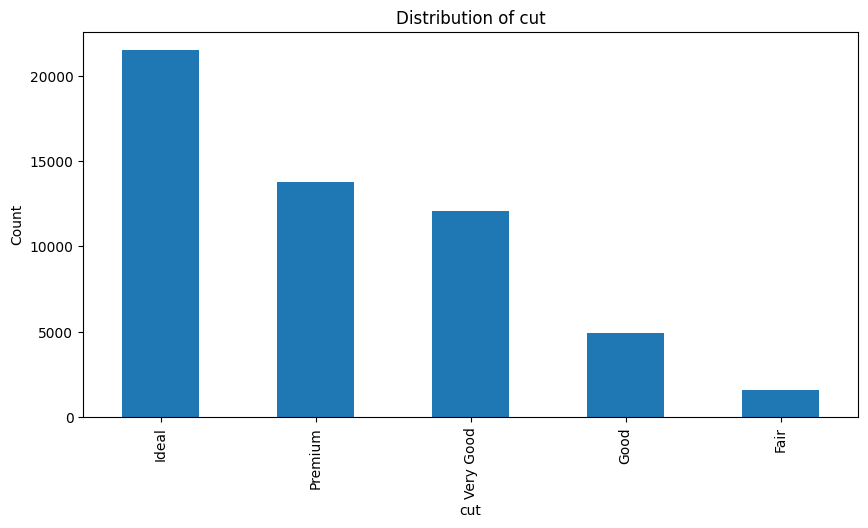

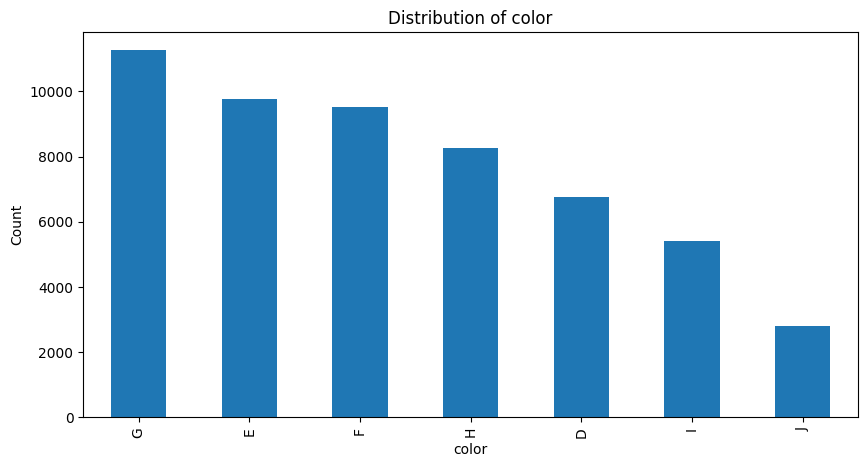

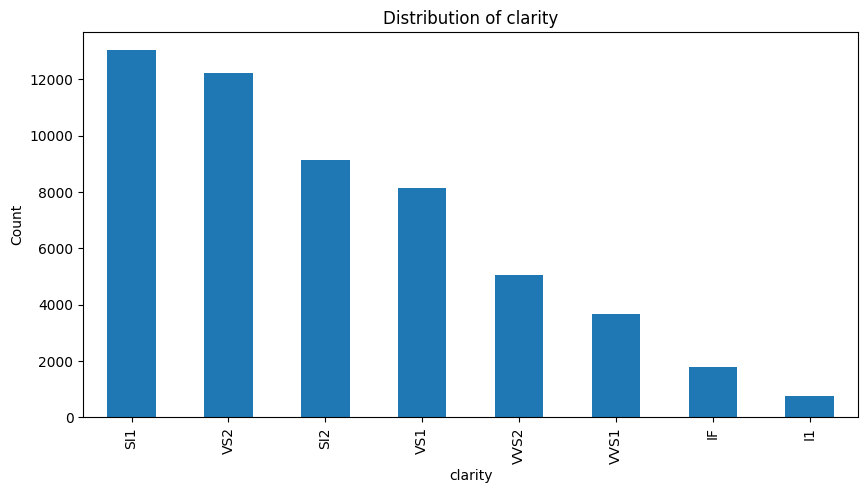

In [13]:
## plotting the distribution in the categorical columns  
for column in dataset.select_dtypes(include=['object']).columns:  
    plt.figure(figsize=(10, 5))  
    dataset[column].value_counts().plot(kind='bar')  
    plt.title(f'Distribution of {column}')  
    plt.xlabel(column)  
    plt.ylabel('Count')  
    plt.show()

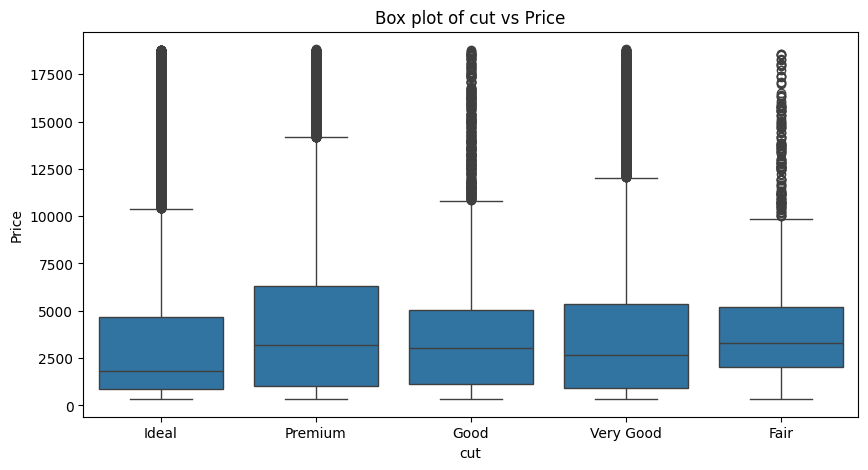

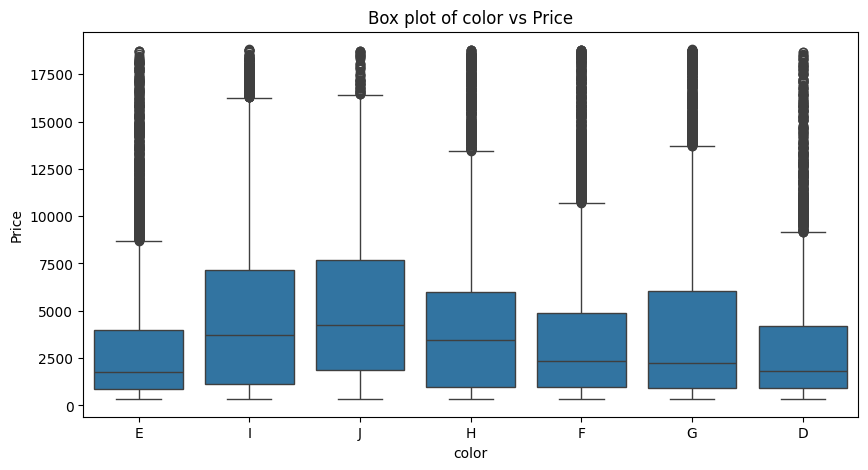

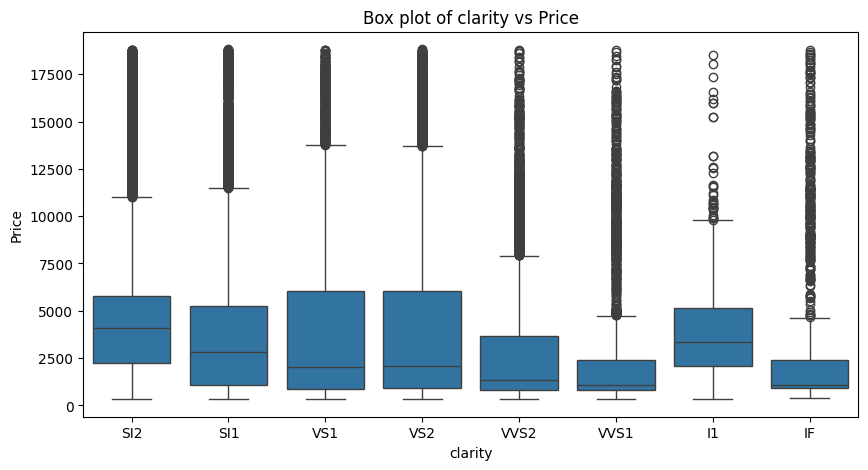

In [14]:
## Box plots for the  categorical columns and one numerical column price
for column in dataset.select_dtypes(include=['object']).columns:  
    plt.figure(figsize=(10, 5))  
    sns.boxplot(x=column, y='price', data=dataset)  
    plt.title(f'Box plot of {column} vs Price')  
    plt.xlabel(column)  
    plt.ylabel('Price')  
    plt.show()

In [15]:
### converting the categorical columns to categorical data type
for column in dataset.select_dtypes(include=['object']).columns:  
    dataset[column] = dataset[column].astype('category')  
## checking the data types of the columns
dataset.dtypes
   

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [16]:
## Descriptive stats  
dataset.groupby('color',observed=True).price.describe().T


color,D,E,F,G,H,I,J
count,6755.000000,9776.000000,9520.000000,11262.000000,8272.000000,5407.000000,2802.000000
mean,3174.441007,3079.608020,3726.749580,4001.352069,4482.855174,5081.751248,5326.415418
std,3359.275179,3346.668862,3786.499787,4051.370351,4211.027964,4717.281497,4433.735840
min,357.000000,326.000000,342.000000,354.000000,337.000000,334.000000,335.000000
25%,911.000000,882.000000,982.000000,932.000000,985.500000,1112.000000,1864.000000
50%,1842.000000,1741.500000,2345.000000,2246.000000,3452.500000,3720.000000,4234.500000
75%,4214.500000,4004.000000,4876.750000,6048.000000,5975.000000,7171.500000,7695.000000
max,18693.000000,18731.000000,18791.000000,18818.000000,18803.000000,18823.000000,18710.000000


In [17]:
## cut  
dataset.groupby('cut',observed=True).price.describe().T

cut,Fair,Good,Ideal,Premium,Very Good
count,1598.000000,4891.000000,21488.000000,13748.000000,12069.000000
mean,4341.954318,3919.121039,3462.749953,4583.501891,3981.016157
std,3540.118138,3671.070930,3810.926394,4348.052680,3934.813175
min,337.000000,327.000000,326.000000,326.000000,336.000000
25%,2049.250000,1144.000000,878.000000,1046.000000,912.000000
50%,3282.000000,3042.000000,1813.000000,3182.000000,2647.000000
75%,5185.750000,5016.500000,4686.750000,6296.000000,5371.000000
max,18574.000000,18788.000000,18806.000000,18823.000000,18818.000000


In [18]:
## clarity 
dataset.groupby('clarity',observed=True).price.describe().T

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,740.000000,1784.000000,13032.000000,9150.000000,8156.000000,12229.000000,3647.000000,5056.000000
mean,3925.275676,2870.569507,3996.165132,5057.455410,3841.611329,3927.741516,2526.602961,3286.532437
std,2808.514795,3925.564866,3799.392104,4255.111031,4011.265796,4041.799932,3337.653276,3823.399309
min,345.000000,369.000000,326.000000,326.000000,327.000000,334.000000,336.000000,336.000000
25%,2077.000000,895.000000,1090.000000,2264.000000,876.000000,900.000000,816.000000,794.750000
50%,3346.000000,1080.000000,2822.000000,4071.500000,2010.000000,2061.000000,1094.000000,1316.000000
75%,5163.250000,2391.500000,5250.000000,5764.000000,6025.750000,6028.000000,2383.500000,3646.750000
max,18531.000000,18806.000000,18818.000000,18804.000000,18795.000000,18823.000000,18777.000000,18768.000000


### **PERFORMING ONE-WAY ANOVA**

In [19]:
## building the model  
linear_model = smf.ols(formula='price ~ cut',data=dataset).fit()
## get the summmary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 21 May 2025   Prob (F-statistic):          1.80e-147
Time:                        15:02:30   Log-Likelihood:            -5.2200e+05
No. Observations:               53794   AIC:                         1.044e+06
Df Residuals:                   53789   BIC:                         1.044e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4341.9543     99.133     43.799      0.000    4147.652    4536.257
cut[T.Good]       -422.8333    114.185     -3.703      0.000    -646.637    -199.029
cut[T.Ideal]      -879.2044    102.753     -8.556      0.000   -1080.602    -677.807
cut[T.Premium]     241.5476    104.736      2.306      0.021      36.263     446.832
cut[T.Very Good]  -360.9382    105.492     -3.421      0.001    -567.704    -154.172
==============================================================================
Omnibus:                    15066.318   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34336.169
Skew:                           1.615   Prob(JB):                         0.00
Kurtosis:                       5.212   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
## ANOVA TABLE    
anova_lm(linear_model)

,df,sum_sq,mean_sq,F,PR(>F)
cut,4.0,1.086528e+10,2.716319e+09,172.967244,1.800085e-147
Residual,53789.0,8.447155e+11,1.570424e+07,NaN,NaN


### **Checking Anova Assumptions**

##### **Assumption 1: Normality Assumption**

In [21]:
## using shapiro wilk test  
shapiro_test = stats.shapiro(linear_model.resid)
shapiro_test


d:\tong_1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53794.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8151910970651608, pvalue=7.87268201528254e-115)

In [22]:
## Using pingouin for normality test
normality = pg.normality(linear_model.resid, method='jarque_bera')
normality

,W,pval,normal
0,34336.169403,0.0,False


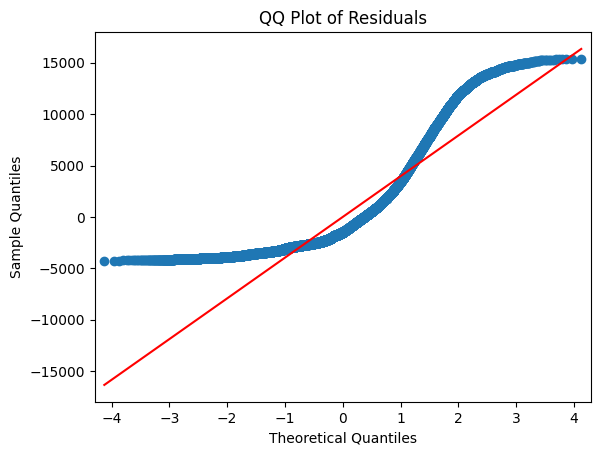

In [23]:
## using the qq plot  
qqplot(linear_model.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

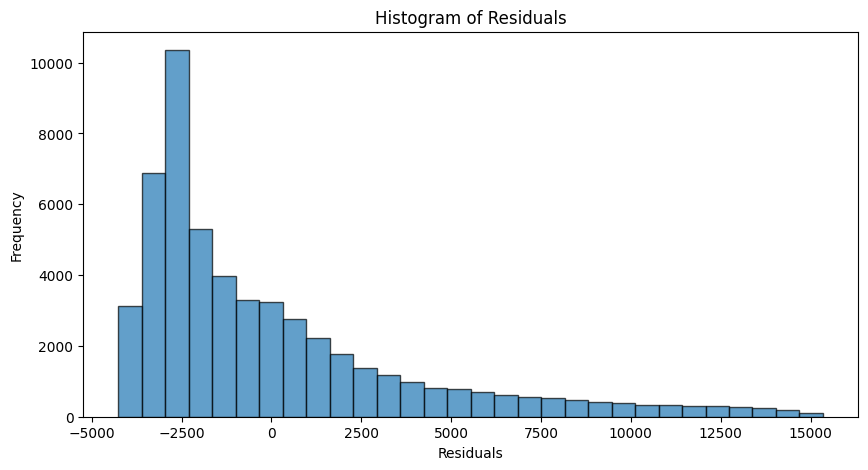

In [24]:
## Histogram of the residuals
plt.figure(figsize=(10, 5))
plt.hist(linear_model.resid, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### **Assumption 2: Homogeneity of Variance Assumption**

In [25]:
##checking the homogeneity of variance using Levene's test on price grouped by cut
homogeneity = pg.homoscedasticity(dataset, dv='price', group='cut', method='levene')
homogeneity

,W,pval,equal_var
levene,122.589991,2.451552e-104,False


In [26]:
## using statsmodels for homogeneity of variance
homogeneity_test = stats.levene(dataset[dataset['cut'] == 'Fair']['price'],
                                 dataset[dataset['cut'] == 'Good']['price'],
                                 dataset[dataset['cut'] == 'Very Good']['price'],
                                 dataset[dataset['cut'] == 'Premium']['price'],
                                 dataset[dataset['cut'] == 'Ideal']['price'])
homogeneity_test

LeveneResult(statistic=122.58999095751322, pvalue=2.4515519039537263e-104)

### **HOW TO PROCEED WHEN ASSUMPTIONS ARE NOT MET**

##### **log Transformation for price**

In [27]:
## log transformation
dataset['log_price'] = np.log(dataset['price'])
## building the model again
linear_model_log = smf.ols(formula='log_price ~ cut', data=dataset).fit()
## get the summary
linear_model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     244.7
Date:                Wed, 21 May 2025   Prob (F-statistic):          1.18e-208
Time:                        15:02:32   Log-Likelihood:                -76616.
No. Observations:               53794   AIC:                         1.532e+05
Df Residuals:                   53789   BIC:                         1.533e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0907      0.025    321.698      0.000       8.041       8.140
cut[T.Good]         -0.2497      0.029     -8.620      0.000      -0.306      -0.193
cut[T.Ideal]        -0.4496      0.026    -17.246      0.000      -0.501      -0.398
cut[T.Premium]      -0.1399      0.027     -5.267      0.000      -0.192      -0.088
cut[T.Very Good]    -0.2920      0.027    -10.911      0.000      -0.344      -0.240
==============================================================================
Omnibus:                    14754.939   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2505.124
Skew:                           0.118   Prob(JB):                         0.00
Kurtosis:                       1.969   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
## checking for the normality of the residuals
shapiro_test_log = stats.shapiro(linear_model_log.resid)
shapiro_test_log

d:\tong_1\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53794.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9700145467781325, pvalue=2.2570614024613597e-70)

In [29]:
## checking for the normality of the residuals using pingouin
normality_log = pg.normality(linear_model_log.resid, method='jarque_bera')
normality_log


,W,pval,normal
0,2505.123725,0.0,False


In [30]:
## checking for homogeneity of variance using Levene's test on log_price grouped by cut
homogeneity_log = pg.homoscedasticity(dataset, dv='log_price', group='cut', method='levene')
homogeneity_log

,W,pval,equal_var
levene,122.310553,4.255883e-104,False


#### **SHIFTING TO KRUSKAL-WALLIS AND WELCH-ANOVA**

In [31]:
## perforrming kruskal wallis test on price
kruskal_test = stats.kruskal(dataset[dataset['cut'] == 'Fair']['price'],
                              dataset[dataset['cut'] == 'Good']['price'],
                              dataset[dataset['cut'] == 'Very Good']['price'],
                              dataset[dataset['cut'] == 'Premium']['price'],
                              dataset[dataset['cut'] == 'Ideal']['price'])
kruskal_test


KruskalResult(statistic=961.6773385002966, pvalue=7.199807910307843e-207)

In [32]:
## pingouin for kruskal wallis test
kruskal_test_pingouin = pg.kruskal(data=dataset, dv='price', between='cut',detailed=True)
kruskal_test_pingouin

,Source,ddof1,H,p-unc
Kruskal,cut,4,961.677339,7.199808e-207


In [33]:
## performing Welch ANOVA
welch_anova = pg.welch_anova(data=dataset, dv='price', between='cut')
welch_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,cut,4,9347.504574,163.114567,3.404718e-135,0.012699


In [34]:
## welch Anova using statsmodels
welch_anova_statsmodels = stats.f_oneway(dataset[dataset['cut'] == 'Fair']['price'],
                                          dataset[dataset['cut'] == 'Good']['price'],
                                          dataset[dataset['cut'] == 'Very Good']['price'],
                                          dataset[dataset['cut'] == 'Premium']['price'],
                                          dataset[dataset['cut'] == 'Ideal']['price'])
welch_anova_statsmodels

F_onewayResult(statistic=172.96724415078137, pvalue=1.8000847005709606e-147)

#### **Effect Size**

In [35]:
## effect size foe welch anova 
eta_squared = welch_anova['np2'].values[0]
eta_squared

0.012699301417168095

In [36]:
## calculating effect size using for kruskal wallis test
eta_squared_kruskal = kruskal_test.statistic / (len(dataset) - 1)
eta_squared_kruskal


0.01787736951834433

### **POST-HOC ANALYSIS USING DUNNS TEST**

In [37]:
## post hoc test using pingouin (pairwise non-parametric tests)
dunn_test_pingouin = pg.pairwise_tests(data=dataset, dv='price', between='cut', parametric=False, padjust='holm',effsize='CLES')
dunn_test_pingouin

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,CLES
0,cut,Fair,Good,False,False,4394065.0,two-sided,7.575039e-14,3.030016e-13,holm,0.562202
1,cut,Fair,Ideal,False,False,22166647.5,two-sided,3.252564e-84,2.927308e-83,holm,0.645546
2,cut,Fair,Premium,False,False,11694658.5,two-sided,2.277648e-05,4.555295e-05,holm,0.532318
3,cut,Fair,Very Good,False,False,11107749.0,two-sided,4.990108e-23,2.495054e-22,holm,0.575941
4,cut,Good,Ideal,False,False,58813852.5,two-sided,7.850329e-39,6.280263e-38,holm,0.559611
5,cut,Good,Premium,False,False,31296758.0,two-sided,6.438520e-13,1.931556e-12,holm,0.465438
6,cut,Good,Very Good,False,False,30141960.0,two-sided,2.989695e-02,2.989695e-02,holm,0.510626
7,cut,Ideal,Premium,False,False,122322690.0,two-sided,1.404513e-163,1.404513e-162,holm,0.414068
8,cut,Ideal,Very Good,False,False,118677738.0,two-sided,4.118697e-38,2.883088e-37,holm,0.457617
9,cut,Premium,Very Good,False,False,90345537.0,two-sided,4.453446e-35,2.672068e-34,holm,0.544498
